# Testing the Tuner Abstraction

In [1]:
import sys
sys.path.append('/Users/sansan01/Learning/Bayesian_Learning/Exp-16/AutoTuner/')

In [2]:
from tuner import Tuner

# Classifier Configuration

In [3]:
from scipy.stats import uniform


clf_name = 'XGBClassifier'
dataset_name = 'load_wine'

param_dict = {"learning_rate": uniform(0, 1),
              "gamma": uniform(0, 5),
              "max_depth": range(1,50),
              "n_estimators": range(1,300),
              "min_child_weight": range(1,10)}


In [13]:
conf_Dict = dict()
conf_Dict['clf_name']=clf_name
conf_Dict['dataset_name'] = dataset_name
conf_Dict['param_dict']=param_dict

conf_Dict['num_iteration'] = 40

#  Tuner functions

In [14]:
tuner_local = Tuner(conf_Dict)

In [15]:
tuner_local.getConf()

{'scheduler': 'local',
 'domain_size': 10000,
 'initial_random': 1,
 'num_iteration': 40,
 'objective': 'maximize',
 'batch_size': 1,
 'param_dict': {'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen at 0x11fabe978>,
  'gamma': <scipy.stats._distn_infrastructure.rv_frozen at 0x11fabee48>,
  'max_depth': range(1, 50),
  'n_estimators': range(1, 300),
  'min_child_weight': range(1, 10)},
 'clf_name': 'XGBClassifier',
 'dataset_name': 'load_wine'}

In [16]:
results = tuner_local.run()

# Inspect the results

In [17]:
print('best hyper parameters:',results['best_hyper_parameter'])
print('best objective:',results['best_objective'])

best hyper parameters: {'gamma': 0.29207440855963995, 'learning_rate': 0.20036231690988549, 'max_depth': 26, 'min_child_weight': 1, 'n_estimators': 222}
best objective: 0.9164750957854406


In [18]:
print('Hyper parameters tried:',len(results['hyper_parameters_tried']))
print(results['hyper_parameters_tried'][:2])

Hyper parameters tried: 41
[{'gamma': 2.1389398414947407, 'learning_rate': 0.1387959974473928, 'max_depth': 44, 'min_child_weight': 8, 'n_estimators': 58}, {'gamma': 3.124220765385944, 'learning_rate': 0.0036607971750117763, 'max_depth': 26, 'min_child_weight': 7, 'n_estimators': 114}]


In [19]:
print('Vairation in the objective values')
print(results['objective_values'])

Vairation in the objective values
[0.8994252873563218, 0.8329501915708812, 0.8938697318007662, 0.8660919540229886, 0.8885057471264369, 0.8436781609195402, 0.8772030651340996, 0.899616858237548, 0.899616858237548, 0.8772030651340996, 0.8214559386973179, 0.8660919540229886, 0.9053639846743295, 0.8660919540229886, 0.8775862068965518, 0.9053639846743295, 0.9053639846743295, 0.899616858237548, 0.899808429118774, 0.899808429118774, 0.9051724137931035, 0.9164750957854406, 0.8885057471264367, 0.8827586206896552, 0.9164750957854406, 0.9053639846743295, 0.9109195402298851, 0.8942528735632185, 0.8716475095785441, 0.8716475095785441, 0.8883141762452107, 0.8549808429118775, 0.8938697318007662, 0.9053639846743295, 0.8883141762452107, 0.8660919540229886, 0.9053639846743295, 0.8885057471264369, 0.9053639846743295, 0.8885057471264369, 0.8660919540229886]


# Plotting the variation in objective values of the tried results

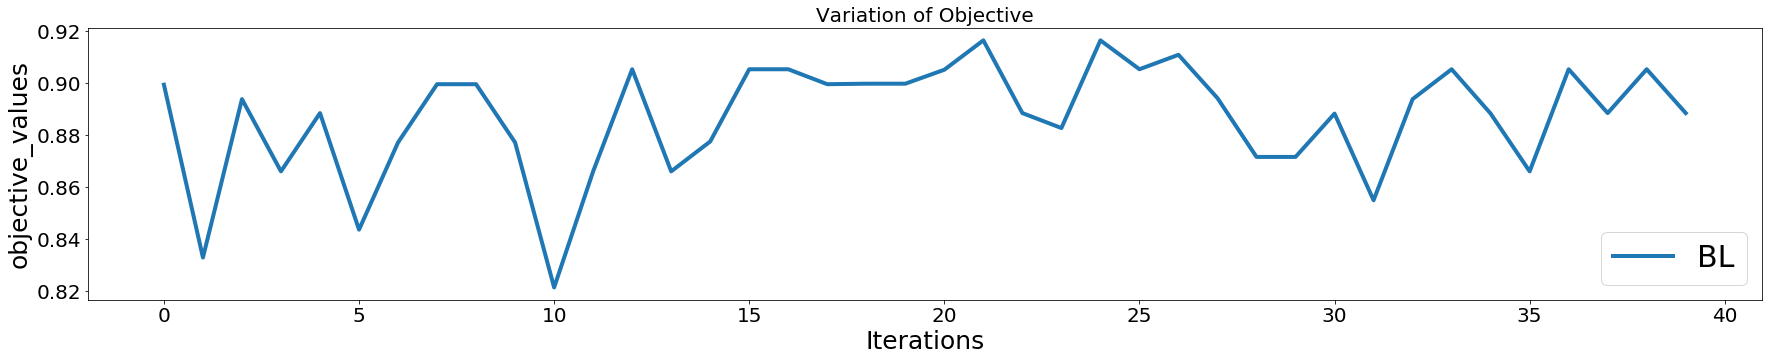

In [20]:
Size = 40 

from matplotlib import pyplot as plt
fig = plt.figure(figsize=(30,5))
plt.title('Variation of Objective',fontsize=20)
plt.plot(results['objective_values'][:Size],lw=4,label='BL')
plt.xlabel('Iterations', fontsize=25)
plt.ylabel('objective_values',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(prop={'size': 30})
plt.show()